# Top 10 Cryptocurrency analysis with Web Scraping

## Install libraries

In [1]:
# pip install requests
# pip install beautifulsoup4
# pip install numpy
# pip install pandas

# Install only if you don´t have them install.


## Import libraries

In [3]:
import requests
from bs4 import BeautifulSoup


## Request for getting information from the web site

In [4]:
pagina_web=requests.get("https://coinmarketcap.com/es/coins/")

print(pagina_web)

# If the message gotten is 'Response [200] so you can get information from de web site'


<Response [200]>


## Getting HTML code

<!DOCTYPE html>
<html dir="ltr" lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/>
  <script>
   (function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()
  </script>
  <script>
   (function() {if (false) {window.__renderTime__.csrRender = 1696795018457;return;}window.__renderTime__ = {"pageInitStart":1696795018427,"pageInitEnd":1696795018445,"pageRender":1696795018457};window.__renderTime__.pageLoad = Date.now();})()
  </script>
  <script>
   (function
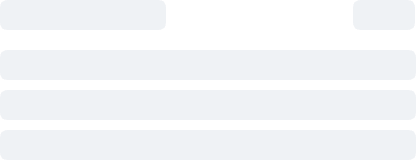

In [5]:
soup=BeautifulSoup(pagina_web.text,'html.parser')  # Getting HTML code

print(soup.prettify())                             # Printing HTML code


## Getting information of the cryptocurrency

### Name

In [6]:
coins = []

name_items=soup.find_all('p', class_='sc-4984dd93-0 kKpPOn')

for item in name_items:
    coin=item.text.strip()
    coins.append(coin)

coins



['Bitcoin',
 'Ethereum',
 'Tether USDt',
 'BNB',
 'XRP',
 'USDC',
 'Solana',
 'Cardano',
 'Dogecoin',
 'TRON']

### Price

In [7]:
prices = []

divs = soup.find_all('div', class_='sc-a0353bbc-0 gDrtaY')

for div in divs[:10]:
    span = div.find('span')
    if span:
        price = span.text.strip()
        price = price[1:]
        price=price.replace(',','')
        final_price=float(price)
        prices.append(final_price)

prices


[27901.52, 1636.46, 1.0, 211.82, 0.5187, 1.0, 23.34, 0.2569, 0.06109, 0.08824]

### Getting current prices, capacities of market and volumes in the last 24 hours

In [20]:
elements = soup.find_all('td', style='text-align:end')

values=[0]

prices=[]
capacities=[]
volumes=[]

for item in elements:

    content = item.get_text(strip=True)

    if content.startswith('$'):
        content=content[1:]
        content=content.replace(',','')
        values.append(content)


for i, element in enumerate(values):
    if i%3==0:
        if i>0:
            element=element[:-4]
        volumes.append(int(element))
    elif i%3==1:
        prices.append(float(element))
    else:
        cadena=element.split('$')
        element=cadena[1]
        capacities.append(int(element))

volumes.remove(0)

print(volumes)
print(capacities)
print(prices)




[7612437868272823, 32593765741991613, 1221863478212212443805, 2651664031251859, 355533562685441396, 15704647121570451651, 1867422048000540, 76383860297349432, 911839491492506397, 1038780651177276852]
[544317343304, 196791248461, 83516758681, 32587306866, 27691611467, 25544278534, 9668806802, 9029036009, 8634517004, 7853058452]
[27901.52, 1636.46, 1.0, 211.82, 0.5187, 1.0, 23.34, 0.2569, 0.06109, 0.08824]


### Getting change in the price in last 24 hours

In [17]:
changes=[]

markets = soup.find_all('td', style='text-align:end')

histories=[0]
history_hour=[]
history_day=[]
history_week=[]


for market in markets:

    change=str(market)

    if change.startswith('<td style="text-align:end"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down"'):
        change = market.get_text(strip=True)
        if change.endswith('%'):
            number = -float(change[:-1])
            histories.append(number)

    elif change.startswith('<td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up"'):
        change = market.get_text(strip=True)
        if change.endswith('%'):
            number = float(change[:-1])
            histories.append(number)


for i,history in enumerate(histories):
    if i%3==0:
        history_week.append(history)
    elif i%3==1:
        history_hour.append(history)
    else:
        history_day.append(history)

history_week.remove(0)

print(history_hour)
print(history_day)
print(history_week)



[-0.19, -0.1, 0.01, -0.14, -0.02, 0.0, -0.3, -0.2, -0.14, -0.11]
[-0.33, -0.31, -0.01, -0.39, -0.9, -0.01, 0.24, -0.98, -0.21, 0.26]
[2.81, -2.58, 0.04, -1.04, 0.37, -0.01, 3.44, -0.7, -1.46, -0.64]


In [18]:
elements = soup.find_all('td', style='text-align:end')
elements_volume = soup.find_all('p', class_='sc-4984dd93-0 jZrMxO font_weight_500')

values=[0]

prices=[]
capacities=[]
volumes=[]

for item in elements:

    content = item.get_text(strip=True)

    if content.startswith('$'):
        content=content[1:]
        content=content.replace(',','')
        values.append(content)


for volume in elements_volume:
    insert=volume.get_text()
    insert=insert[1:]
    insert=insert.replace(',','')
    print(insert)


7612437868
3259376574
12218634782
265166403
355533562
1570464712
186742204
76383860
91183949
103878065
